In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 10

In [3]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]

In [5]:
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [5]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
df

,Pct_To_Target,Sales_Target,Sales
0,0.92,100000,92000.0
1,1.03,300000,309000.0
2,0.90,300000,270000.0
3,1.11,100000,111000.0
4,0.99,75000,74250.0
...,...,...,...
495,0.90,400000,360000.0
496,0.98,75000,73500.0
497,1.00,100000,100000.0
498,1.10,75000,82500.0


In [5]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [7]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.92,100000,92000.0,0.03,2760.0
1,1.03,300000,309000.0,0.04,12360.0
2,0.90,300000,270000.0,0.02,5400.0
3,1.11,100000,111000.0,0.04,4440.0
4,0.99,75000,74250.0,0.03,2227.5
...,...,...,...,...,...
495,0.90,400000,360000.0,0.02,7200.0
496,0.98,75000,73500.0,0.03,2205.0
497,1.00,100000,100000.0,0.04,4000.0
498,1.10,75000,82500.0,0.04,3300.0


In [14]:
# df['Commission_Amount'].hist()

In [13]:
df['Commission_Amount'].sum()

2793017.5

In [6]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [12]:
all_stats

[[83589250.0, 2796262.0, 83750000],
 [85950500.0, 2961435.0, 85600000],
 [89997000.0, 3090065.0, 89350000],
 [81095250.0, 2746005.0, 81250000],
 [78189250.0, 2652998.0, 78750000],
 [79778750.0, 2717092.0, 80325000],
 [78012500.0, 2599812.0, 78725000],
 [81177000.0, 2778835.0, 81150000],
 [82749750.0, 2877948.0, 82250000],
 [81227250.0, 2793018.0, 80825000]]

In [7]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [8]:
# results_df.describe().style.format('{:,}')

In [9]:
results_df

,Sales,Commission_Amount,Sales_Target
0,83589250.0,2796262.0,83750000
1,85950500.0,2961435.0,85600000
2,89997000.0,3090065.0,89350000
3,81095250.0,2746005.0,81250000
4,78189250.0,2652998.0,78750000
5,79778750.0,2717092.0,80325000
6,78012500.0,2599812.0,78725000
7,81177000.0,2778835.0,81150000
8,82749750.0,2877948.0,82250000
9,81227250.0,2793018.0,80825000


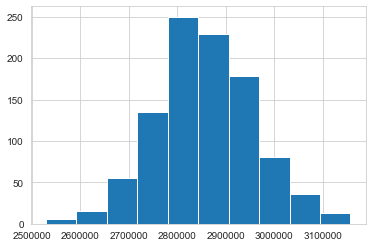

In [9]:
results_df['Commission_Amount'].hist()